<a href="https://colab.research.google.com/github/Parinita-Jain/ML_LectureNotes/blob/main/ROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("diabeties.csv")
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Goal -: We need to create a ML model, which has the ability to Predict the Patient as Positive if they are actually Positive.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
#sns.pairplot(df)

In [30]:
#sns.pairplot(data=df, hue="target")

In [31]:
df.target.value_counts()

,count
target,
0,500
1,268


In [32]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")
#In confusion matrix, 36 FN and 14 FP,
# if u see recall value,modelis predicting non-diabetic 0.90 times,and for diabetic only, 0.58 times.
# i.e. out of 100 diabetic people, 58 are correctly predicted and rest are missed.Recall value is not great.
# f1-score for diabetic people is 66.So we can change the threshold.

Accuracy : 0.7835497835497836
ROC : 0.740290088638195
[[132  14]
 [ 36  49]]

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [33]:
# but before changing threshold, we will check bias-variance,so that we get a clear picture if we need to
# apply hyperparameter tuning as well.
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")
# low bias ,low varince..Soour model is good..its just performing bad when it comes to +ve values.

Training Accuracy - : 0.7728119180633147
Testing Accuracy -: 0.7835497835497836


In [34]:
print(f"Actual Values     : {ytest[:25].values}") # to convert df into numpy array
print(f"Predicted Values  : {ypred[:25]}") # it'salready in 1 D array format

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [35]:
print(f"Actual Values     : {ytest[25:51].values}")
print(f"Predicted Values  : {ypred[25:51]}")

Actual Values     : [0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]
Predicted Values  : [0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]


In [36]:
logreg.predict_proba(xtest) # it gives prob of observation, that it will go under 0 class or class 1

array([[0.58032813, 0.41967187],
       [0.69598568, 0.30401432],
       [0.85396067, 0.14603933],
       [0.94488215, 0.05511785],
       [0.79041088, 0.20958912],
       [0.72195418, 0.27804582],
       [0.64281478, 0.35718522],
       [0.89578541, 0.10421459],
       [0.83486381, 0.16513619],
       [0.78865461, 0.21134539],
       [0.5698186 , 0.4301814 ],
       [0.92476515, 0.07523485],
       [0.01892342, 0.98107658],
       [0.27339781, 0.72660219],
       [0.97529048, 0.02470952],
       [0.28359651, 0.71640349],
       [0.76388317, 0.23611683],
       [0.69653812, 0.30346188],
       [0.86987211, 0.13012789],
       [0.84391789, 0.15608211],
       [0.61762117, 0.38237883],
       [0.86682398, 0.13317602],
       [0.04837526, 0.95162474],
       [0.73913466, 0.26086534],
       [0.92719338, 0.07280662],
       [0.59279714, 0.40720286],
       [0.79785471, 0.20214529],
       [0.2752282 , 0.7247718 ],
       [0.91822216, 0.08177784],
       [0.54186764, 0.45813236],
       [0.

In [37]:
ypredprob = logreg.predict_proba(xtest)[:, 1] # now, we want to make changes for 1 value. All rows of 1st col
# we want to change the prediction threshold from 0.5 to 0.3

In [38]:
ypredprob #probability of a patient for being diabetic i.e for class 1

array([0.41967187, 0.30401432, 0.14603933, 0.05511785, 0.20958912,
       0.27804582, 0.35718522, 0.10421459, 0.16513619, 0.21134539,
       0.4301814 , 0.07523485, 0.98107658, 0.72660219, 0.02470952,
       0.71640349, 0.23611683, 0.30346188, 0.13012789, 0.15608211,
       0.38237883, 0.13317602, 0.95162474, 0.26086534, 0.07280662,
       0.40720286, 0.20214529, 0.7247718 , 0.08177784, 0.45813236,
       0.40702982, 0.32588622, 0.0538027 , 0.70135822, 0.12931883,
       0.66591702, 0.08929764, 0.18093244, 0.10298307, 0.62318001,
       0.21041975, 0.08638806, 0.0388557 , 0.28110234, 0.07069425,
       0.0234013 , 0.75654049, 0.81110917, 0.07656673, 0.14243049,
       0.00862444, 0.17868323, 0.83424938, 0.05098882, 0.74498056,
       0.10065445, 0.61669816, 0.2984701 , 0.56307113, 0.17096943,
       0.61629026, 0.01321677, 0.71613974, 0.22047287, 0.37419847,
       0.11161559, 0.01526976, 0.35705784, 0.70061404, 0.60268376,
       0.8810129 , 0.75321707, 0.58182177, 0.01788044, 0.68118

In [39]:

from sklearn.preprocessing import binarize
'''
is used to convert predicted probabilities (ypredprob)
into binary class predictions based on a specified threshold (0.3 in this case).
'''

'\nis used to convert predicted probabilities (ypredprob) \ninto binary class predictions based on a specified threshold (0.3 in this case).\n'

In [40]:
#ypredprop is a 1 d array and we need to pass it into 2 d, seperate threshold of 0.3
#binarize expects a 2D array as input. Wrapping ypredprob in [ ] makes it a 2D array with one row.
#Index [0]:Since binarize returns a 2D array, [0] extracts the first (and only) row back as a 1D array.

ypred = binarize([ypredprob], threshold=0.3)[0] # since we have passed 2 d array,it is giving us 2D,therefore
# passing index 0, to get 1D



In [41]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}") # typecasting because currently values are in float.

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0]


In [42]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")
# type2 error decreased from 36 to 17,80% ofthe timeif patient is +ve,model will say it +ve.

Accuracy : 0.7705627705627706
ROC : 0.7767123287671234
[[110  36]
 [ 17  68]]

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       146
           1       0.65      0.80      0.72        85

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231



In [43]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 0.7728119180633147
Testing Accuracy -: 0.7835497835497836


In [44]:
from sklearn.metrics import roc_curve

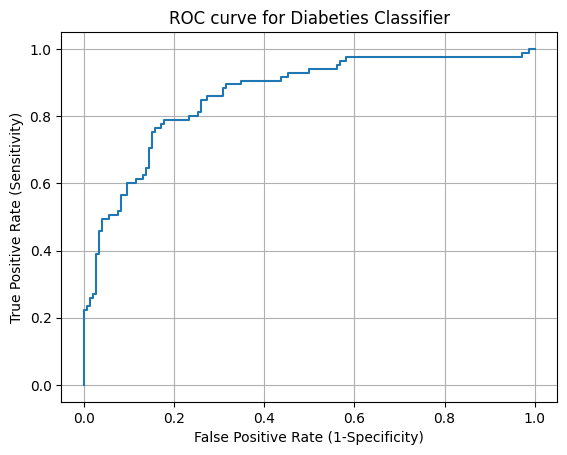

In [45]:
fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)

plt.title("ROC curve for Diabeties Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid()
plt.show()